# 数据科学编程Ⅱ Assignment3

# 姓名：聂嘉一 

# 学号：320200931181

## 1. 将EXCEL二维表格构建为字典

In [40]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

df = pd.read_excel('A0201.xls',skiprows=2).fillna(0)           #从民族那一行载入，并将df中的nan值替换为0
df1 = df.iloc[0,1:][::3]
list_first_tier = df1.values

df2 = df.iloc[2:, 0]
list_second_tier = df2.values

In [41]:
dataDict = dict(collections.OrderedDict())

for i in range(len(list_first_tier)):
    race = list_first_tier[i]
    raceDict = dict(collections.OrderedDict())
    raceDictKeyList = df.iloc[1,1+3*i:1+3*i+3].tolist()
 
    for j in range(len(raceDictKeyList)):
        raceDictKey = raceDictKeyList[j]
        ageValueList = df.iloc[2:,1+3*i+j].tolist()
        trdDict = dict(collections.OrderedDict())
        for k in range(len(ageValueList)):
            age = str(list_second_tier[k])
            trdDict[age] = ageValueList[k]
        raceDict[raceDictKey] = trdDict
    dataDict[race] = raceDict
    
print(dataDict)

{'合    计': {'合计': {'总  计': 1332810869, '0-4岁': 75532610, '0': 13786434, '1': 15657955, '2': 15617375, '3': 15250805, '4': 15220041, '5-9岁': 70881549, '5': 14732137, '6': 14804470, '7': 13429161, '8': 13666956, '9': 14248825, '10-14岁': 74908462, '10': 14454357, '11': 13935714, '12': 15399559, '13': 15225032, '14': 15893800, '15-19岁': 99889114, '15': 18024484, '16': 18790521, '17': 20775369, '18': 20755274, '19': 21543466, '20-24岁': 127412518, '20': 28026954, '21': 26556649, '22': 24474192, '23': 25695955, '24': 22658768, '25-29岁': 101013852, '25': 19933683, '26': 19709177, '27': 19480836, '28': 22322147, '29': 19568009, '30-34岁': 97138203, '30': 18928369, '31': 19866458, '32': 19474874, '33': 18179478, '34': 20689024, '35-39岁': 118025959, '35': 21186516, '36': 22906980, '37': 23990208, '38': 24730460, '39': 25211795, '40-44岁': 124753964, '40': 27397219, '41': 24956297, '42': 27032542, '43': 21355748, '44': 24012158, '45-49岁': 105594553, '45': 23962574, '46': 23355778, '47': 26972157, '4

## 2. 总人口的统计数据与图表 (所有民族)

### 2.1 统计总人口、男、女平均年龄

In [42]:
male_by_age = dataDict['合    计']['男']
women_by_age = dataDict['合    计']['女']
male_num = male_by_age['总  计']
women_num = women_by_age['总  计']
male_age_sum_list = []
women_age_sum_list = []


for key in male_by_age:
    if len(str(key)) < 3:
        male_age_sum_list.append(int(key) * male_by_age[key])
    male_age_sum_list.append(100 * int(male_by_age['100岁及以上']))

for key in women_by_age:
    if len(str(key)) < 3:
        women_age_sum_list.append(int(key) * women_by_age[key])
    women_age_sum_list.append(100 * int(women_by_age['100岁及以上']))

avg_male_age = sum(male_age_sum_list)/male_num
avg_women_age = sum(women_age_sum_list)/women_num

print('中国男性的平均年龄是', format(avg_male_age, '.3f'),'岁。')
print('中国女性的平均年龄是',format(avg_women_age, '.3f'),'岁。')

中国男性的平均年龄是 35.268 岁。
中国女性的平均年龄是 36.706 岁。


### 2.2 统计总人口、男、女中位数年龄

In [43]:
male_median_num = male_num / 2
women_median_num = women_num / 2

for key in male_by_age:
    if len(key) < 3:
        male_num -= male_by_age[key]
    if male_num < male_median_num:
        print('中国男性的中位数年龄是',key,'岁。')
        male_num = male_by_age['总  计']  #还原male_num
        break

for key in women_by_age:
    if len(key) < 3:
        women_num -= women_by_age[key]
    if women_num < women_median_num:
        print('中国女性的中位数年龄是',key,'岁。')
        women_num = women_by_age['总  计']
        break

中国男性的中位数年龄是 35 岁。
中国女性的中位数年龄是 36 岁。


### 2.3 绘制年龄-人口直方图

In [44]:
n=0
male_age_list = []
women_age_list = []
male_group_age_list = []
women_group_age_list = []

for key in male_by_age:
    if len(key) < 3:
        male_age_list.append(male_by_age[key])

for key in women_by_age:
    if len(key) < 3:
        women_age_list.append(women_by_age[key])

age_list = range(0,101)
male_age_list.append(int(male_by_age['100岁及以上']))
women_age_list.append(int(women_by_age['100岁及以上']))

while n <10:
    male_group_age_list.append(sum(male_age_list[n*10:n*10+10]))
    women_group_age_list.append(sum(women_age_list[n*10:n*10+10]))
    n+=1
    
male_group_age_list.append(male_age_list[-1])
women_group_age_list.append(women_age_list[-1])

# print(male_group_age_list)
# print(women_group_age_list)

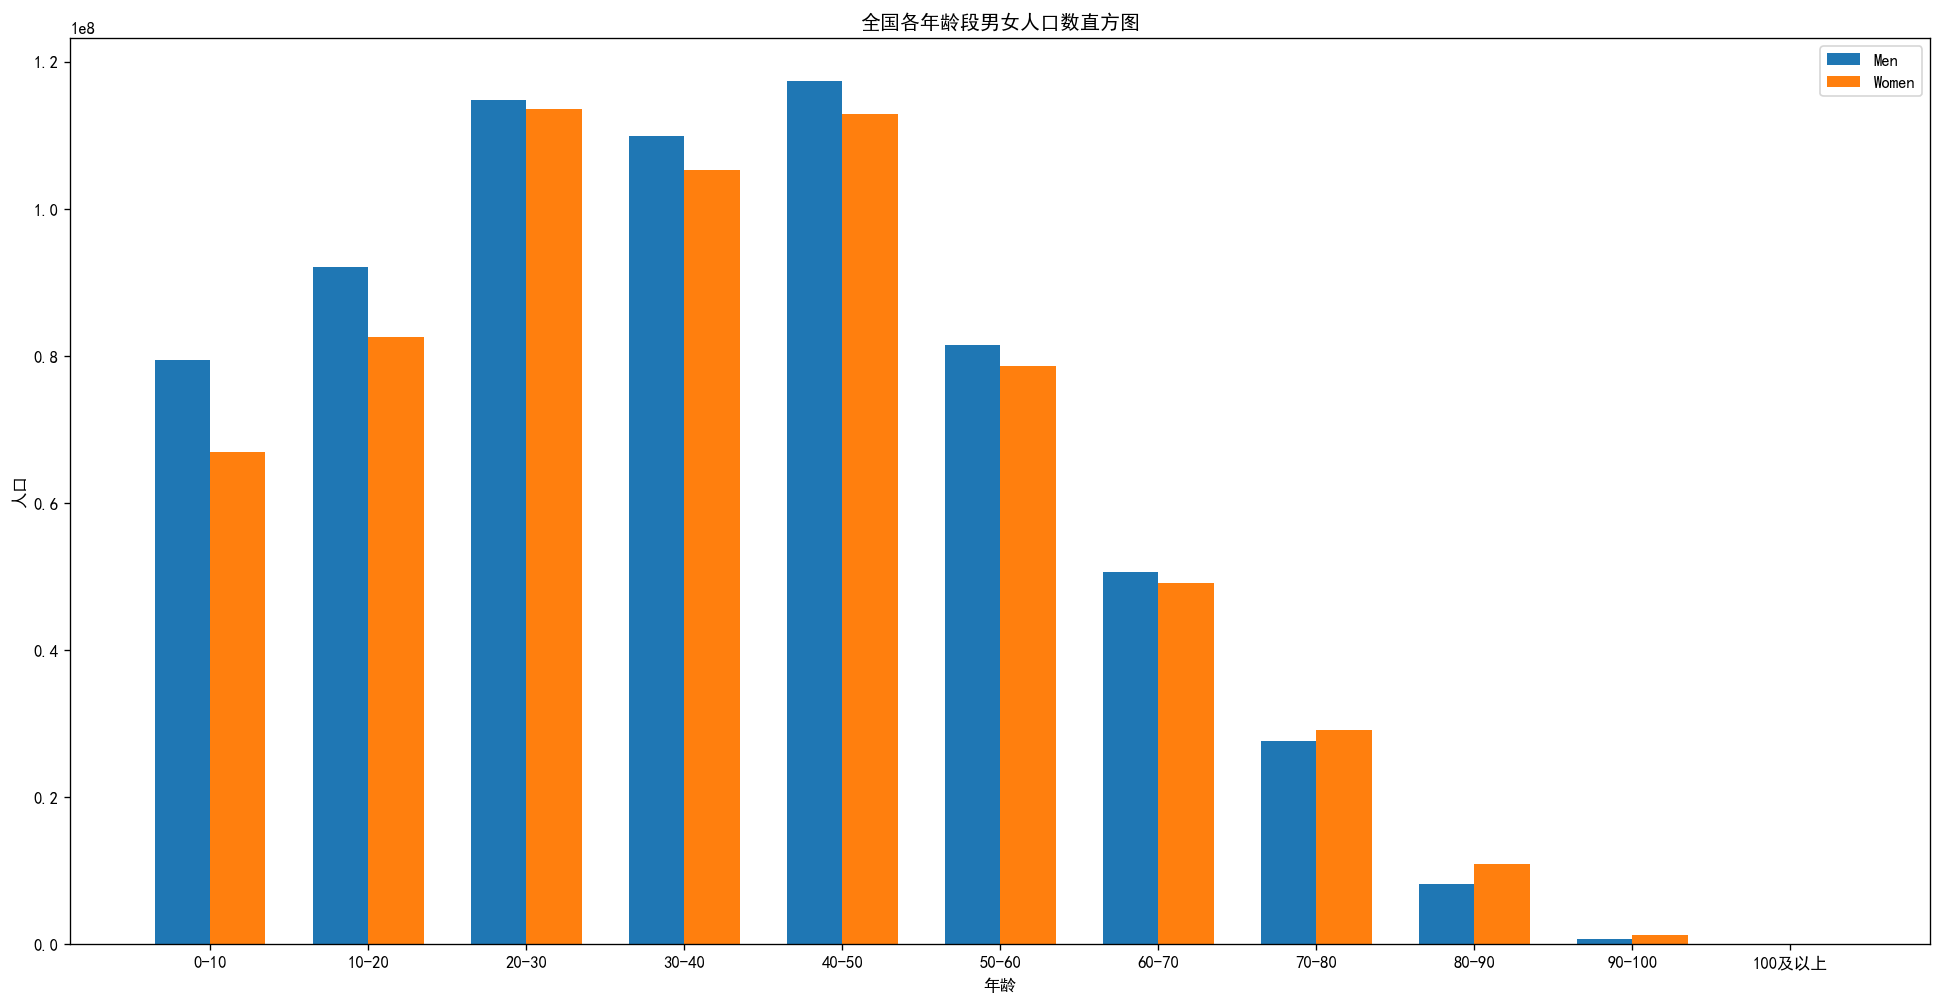

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def showBarChart(): 
    labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100及以上']
    men_means = male_group_age_list
    women_means = women_group_age_list
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(20,10),dpi = 120)
    rects1 = ax.bar(x - width/2, men_means, width, label='Men')
    rects2 = ax.bar(x + width/2, women_means, width, label='Women')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('年龄')
    ax.set_ylabel('人口')
    ax.set_title('全国各年龄段男女人口数直方图')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
showBarChart()

### 2.4 绘制年龄-人口直方图（人口数归一化）

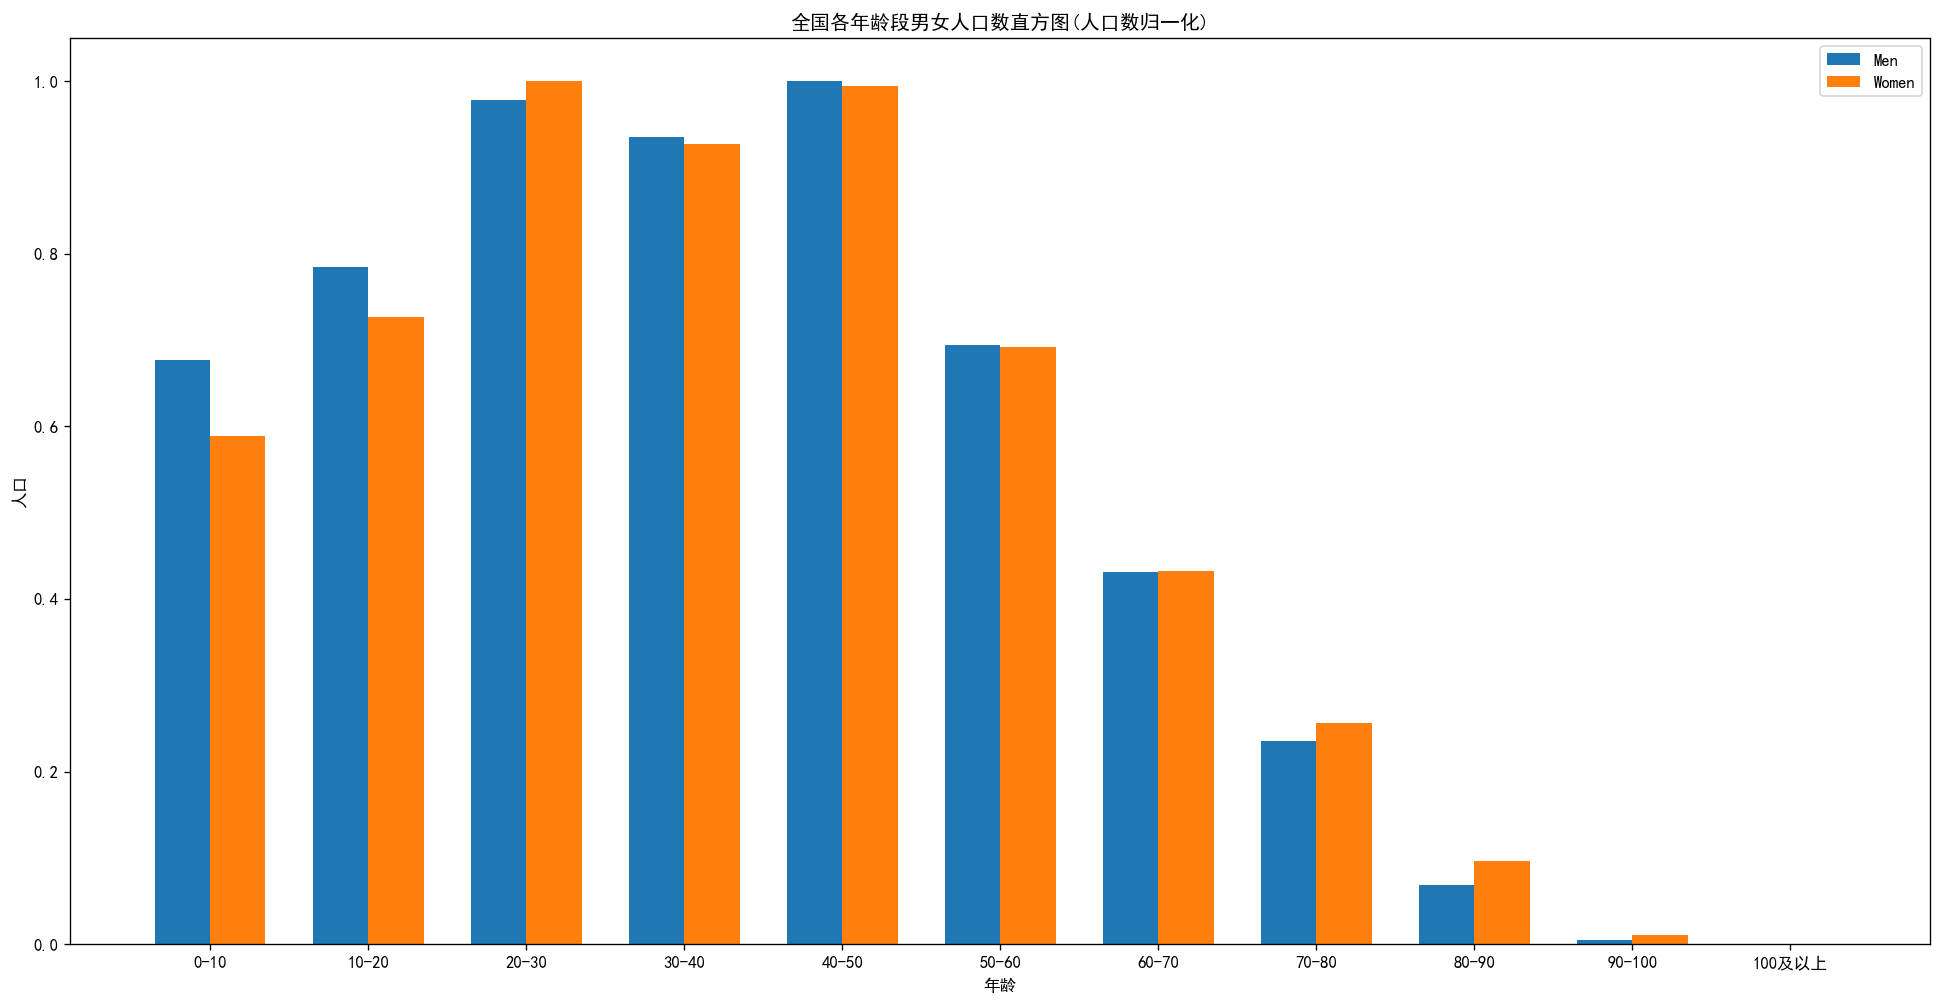

In [46]:
import copy
norm_male_groupage_list = copy.deepcopy(male_group_age_list)
norm_women_groupage_list = copy.deepcopy(women_group_age_list)

male_min = min(norm_male_groupage_list) 
male_max = max(norm_male_groupage_list)
women_min = min(norm_women_groupage_list) 
women_max = max(norm_women_groupage_list)

for i, x in enumerate(norm_male_groupage_list):
    norm_male_groupage_list[i] = float(format((x-male_min) / (male_max-male_min), '.3f'))

for i, x in enumerate(norm_women_groupage_list):
    norm_women_groupage_list[i] = float(format((x-women_min) / (women_max-women_min), '.3f'))

def showNormBarChart(): 
    labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100及以上']
    men_means = norm_male_groupage_list
    women_means = norm_women_groupage_list
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(20,10),dpi = 120)
    rects1 = ax.bar(x - width/2, men_means, width, label='Men')
    rects2 = ax.bar(x + width/2, women_means, width, label='Women')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('年龄')
    ax.set_ylabel('人口')
    ax.set_title('全国各年龄段男女人口数直方图(人口数归一化)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
showNormBarChart()

### 2.5 绘制饼图

In [47]:
total_age_list = []
total_groupage_list=[]
total_by_age = dataDict['合    计']['合计']

for key in total_by_age:
    if len(key) < 3:
        total_age_list.append(total_by_age[key])

total_age_list.append(int(total_by_age['100岁及以上']))

m = 0
while m <20:
    total_groupage_list.append(sum(total_age_list[m*5:m*5+5]))
    m+=1
    
# print(total_groupage_list) #len = 20

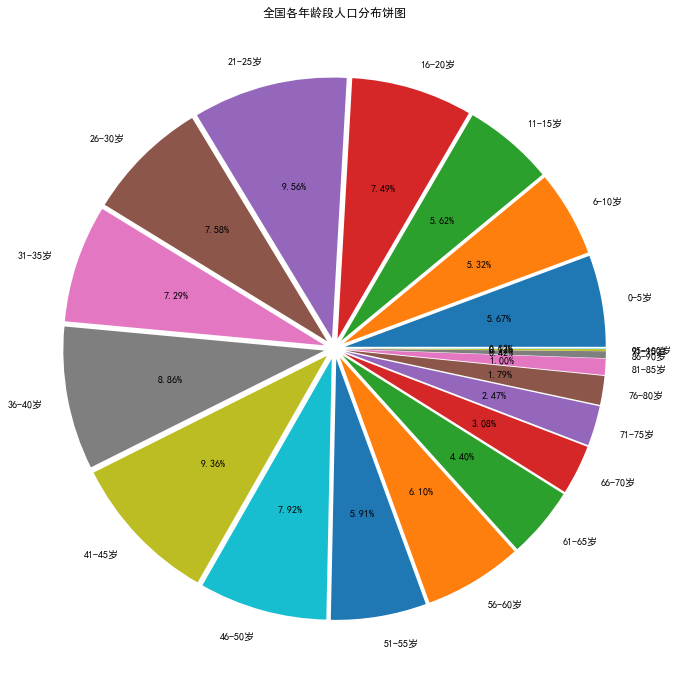

In [63]:
def showPieChart():
    plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
    label = ['0-5岁','6-10岁','11-15岁','16-20岁','21-25岁','26-30岁','31-35岁','36-40岁','41-45岁','46-50岁','51-55岁','56-60岁','61-65岁','66-70岁','71-75岁','76-80岁','81-85岁','86-90岁','91-95岁','95-100岁']#定义饼图的标签，标签是列表
    explode = [0.04]*20 #设定各项距离圆心n个半径
    values = total_groupage_list
    plt.pie(values,explode=explode,labels=label,autopct='%1.2f%%')#绘制饼图
    plt.title('全国各年龄段人口分布饼图')#绘制标题
    plt.show()

showPieChart()

## 3. 各个民族人口的统计数据与图表

### 3.1 统计各民族总人口、男、女、平均年龄

### 3.2 统计各民族总人口、男、女、中位数年龄

In [49]:
nation_list = list(list_first_tier)
del nation_list[0]

for i in nation_list:
    male_by_age = dataDict[i]['男']
    women_by_age = dataDict[i]['女']
    male_num = male_by_age['总  计']
    women_num = women_by_age['总  计']
    male_median_num = male_num / 2
    women_median_num = women_num / 2
    male_age_sum_list = []
    women_age_sum_list = []

    for key in male_by_age:
        if len(str(key)) < 3:
            male_age_sum_list.append(int(key) * male_by_age[key])
        male_age_sum_list.append(100 * int(male_by_age['100岁及以上']))

    for key in women_by_age:
        if len(str(key)) < 3:
            women_age_sum_list.append(int(key) * women_by_age[key])
        women_age_sum_list.append(100 * int(women_by_age['100岁及以上']))    

    avg_male_age = sum(male_age_sum_list)/male_num
    avg_women_age = sum(women_age_sum_list)/women_num
    
    
    print()
    
    for key in male_by_age:
        if len(key) < 3:
            male_num -= male_by_age[key]
        if male_num < male_median_num:
            print('我国',i,'男性的平均年龄是', format(avg_male_age, '.3f'),'岁,中位数年龄是',key,'岁；')
            male_num = male_by_age['总  计']  #还原male_num
            break

    for key in women_by_age:
        if len(key) < 3:
            women_num -= women_by_age[key]
        if women_num < women_median_num:
            print('我国',i,'女性的平均年龄是',format(avg_women_age, '.3f'),'岁，中位数年龄是',key,'岁。\n')
            women_num = women_by_age['总  计']
            break    


我国 汉    族 男性的平均年龄是 35.583 岁,中位数年龄是 35 岁；
我国 汉    族 女性的平均年龄是 37.053 岁，中位数年龄是 36 岁。


我国 蒙 古 族 男性的平均年龄是 31.608 岁,中位数年龄是 30 岁；
我国 蒙 古 族 女性的平均年龄是 32.271 岁，中位数年龄是 31 岁。


我国 回    族 男性的平均年龄是 32.510 岁,中位数年龄是 31 岁；
我国 回    族 女性的平均年龄是 33.553 岁，中位数年龄是 31 岁。


我国 藏    族 男性的平均年龄是 29.249 岁,中位数年龄是 27 岁；
我国 藏    族 女性的平均年龄是 30.409 岁，中位数年龄是 27 岁。


我国 维吾尔族 男性的平均年龄是 29.443 岁,中位数年龄是 26 岁；
我国 维吾尔族 女性的平均年龄是 29.083 岁，中位数年龄是 26 岁。


我国 苗    族 男性的平均年龄是 30.656 岁,中位数年龄是 29 岁；
我国 苗    族 女性的平均年龄是 32.166 岁，中位数年龄是 30 岁。


我国 彝    族 男性的平均年龄是 28.996 岁,中位数年龄是 27 岁；
我国 彝    族 女性的平均年龄是 30.263 岁，中位数年龄是 28 岁。


我国 壮    族 男性的平均年龄是 33.096 岁,中位数年龄是 32 岁；
我国 壮    族 女性的平均年龄是 35.722 岁，中位数年龄是 33 岁。


我国 布 依 族 男性的平均年龄是 30.733 岁,中位数年龄是 29 岁；
我国 布 依 族 女性的平均年龄是 33.001 岁，中位数年龄是 31 岁。


我国 朝 鲜 族 男性的平均年龄是 40.250 岁,中位数年龄是 41 岁；
我国 朝 鲜 族 女性的平均年龄是 42.014 岁，中位数年龄是 42 岁。


我国 满    族 男性的平均年龄是 35.056 岁,中位数年龄是 35 岁；
我国 满    族 女性的平均年龄是 34.743 岁，中位数年龄是 34 岁。


我国 侗    族 男性的平均年龄是 32.919 岁,中位数年龄是 32 岁；
我国 侗    族 女性的平均年龄是 34.321 岁，中位数年龄是 34 岁。


我

### 3.3 绘制民族-人口直方图

In [61]:
nation_num_list = []
nation_list = list(list_first_tier)
del nation_list[0]

for i in nation_list:
    nation_num_list.append(dataDict[i]['小计']['总  计'])
    

# print(len(nation_list)) = 58
# print(len(nation_num_list)) = 58

58
58


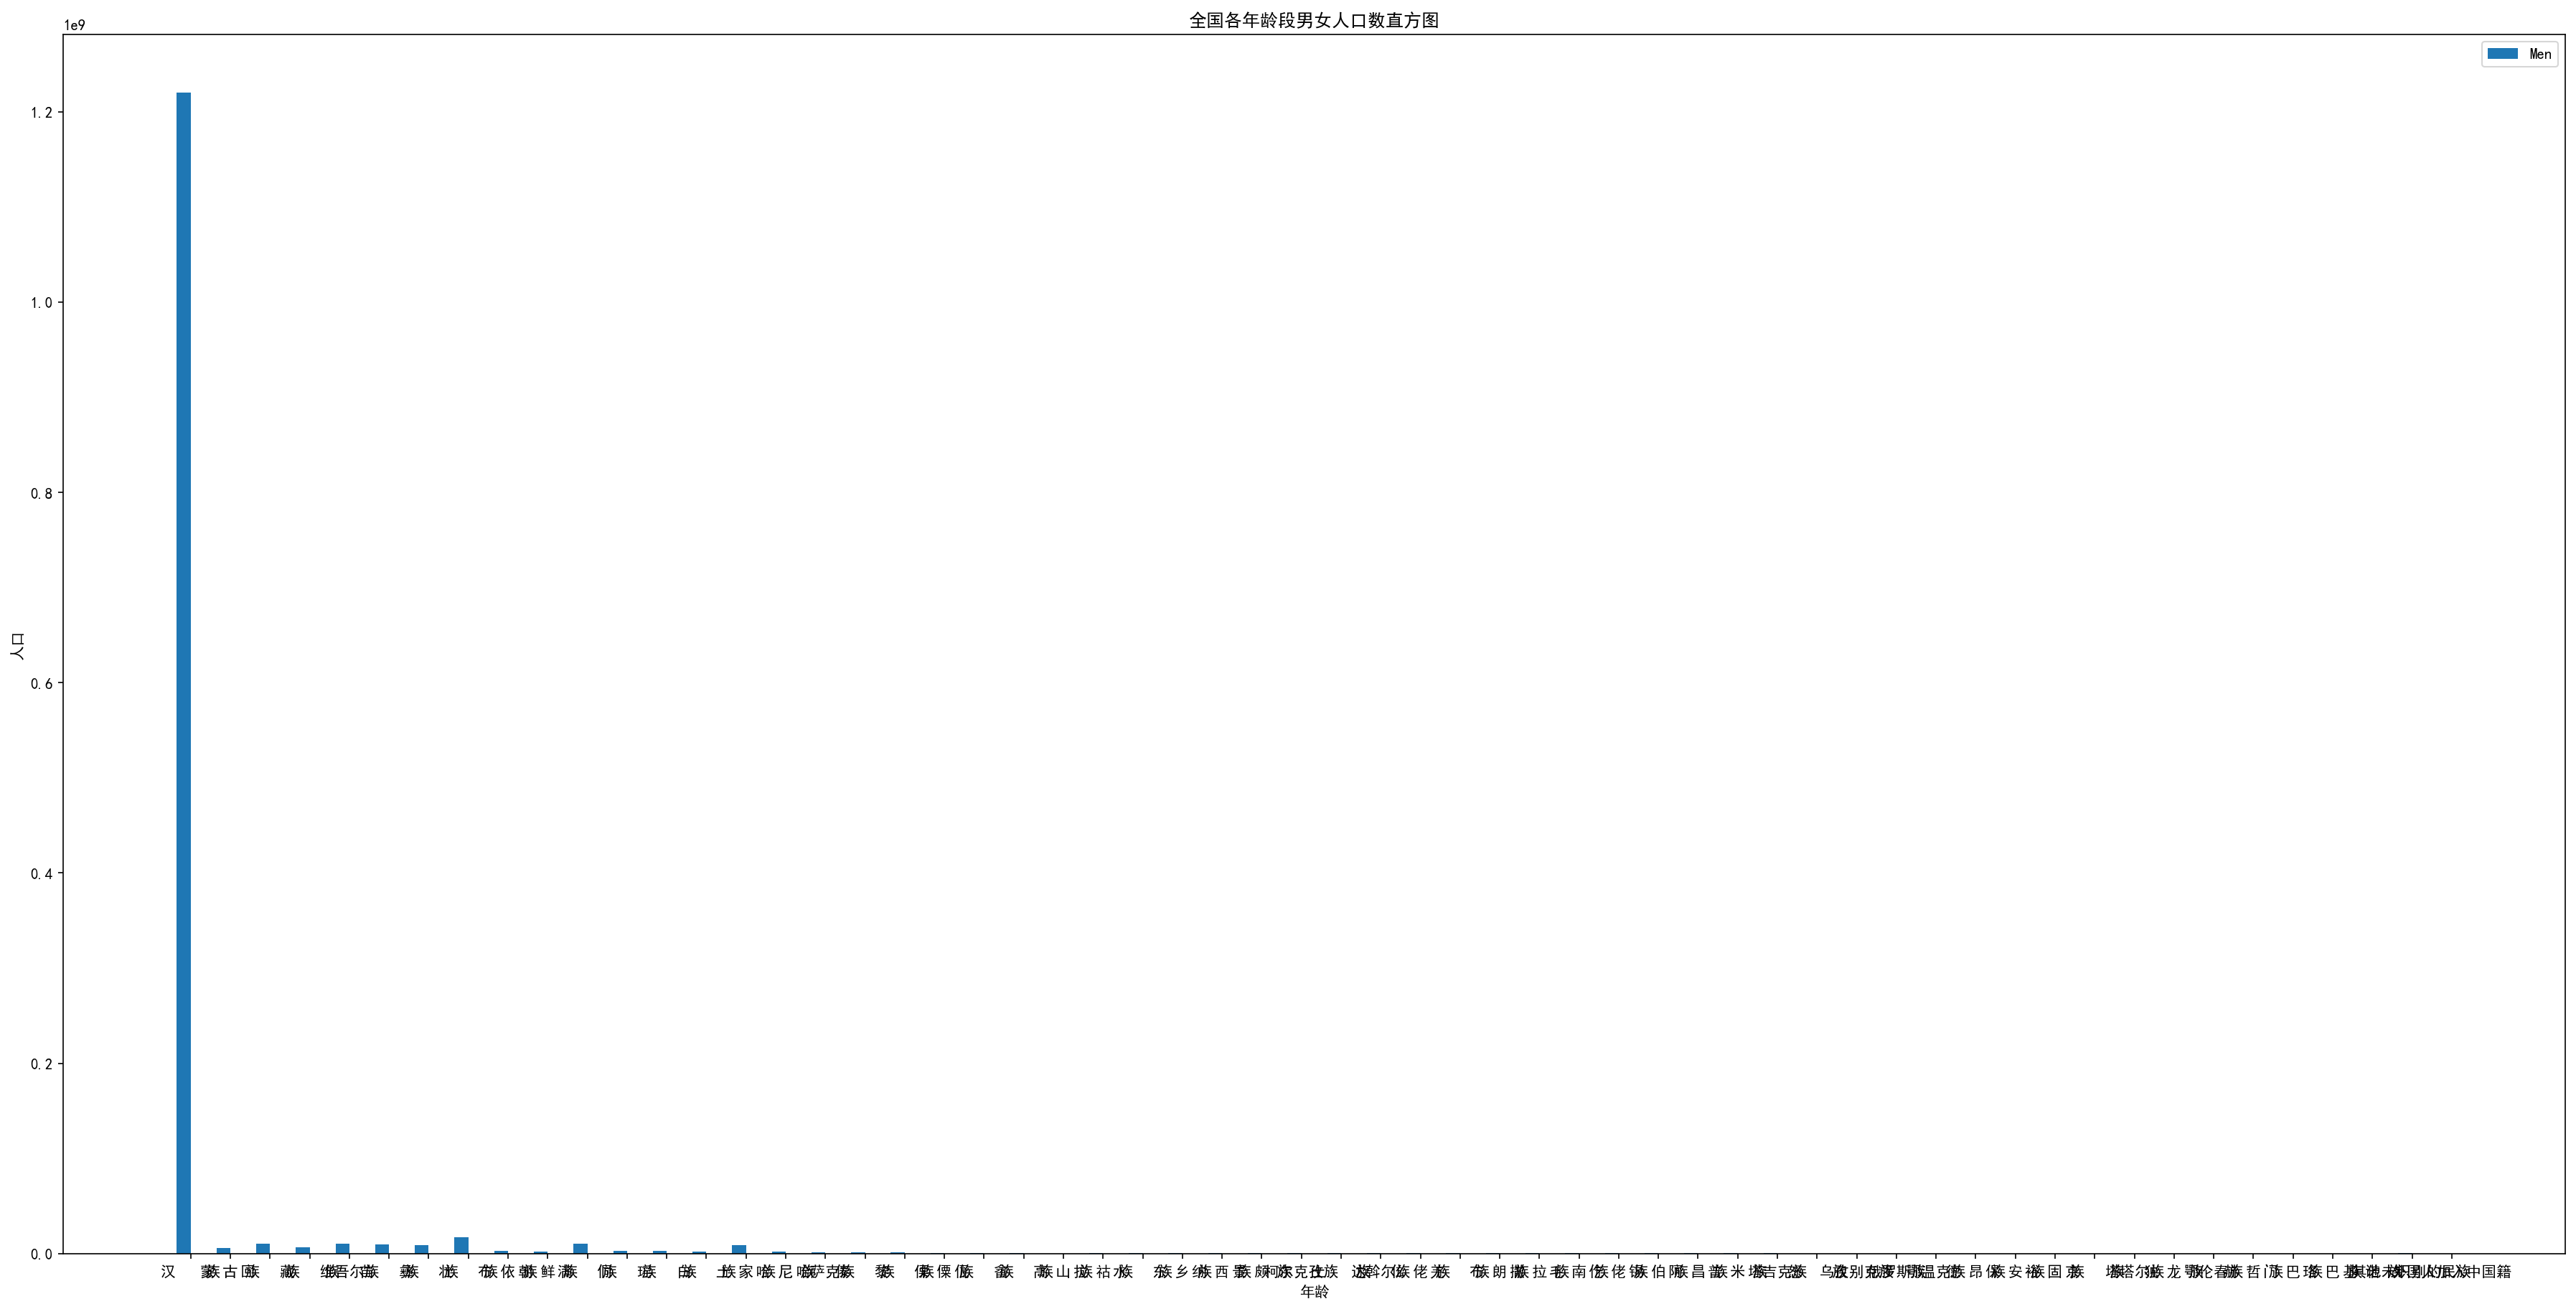

In [62]:
import matplotlib.pyplot as plt
# del nation_list[0]
# del nation_num_list[0]

def showNationBarChart(): 
    labels = nation_list
    men_means = nation_num_list
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(30,15),dpi = 150)
    rects1 = ax.bar(x - width/2, men_means, width, label='Men')
    
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('年龄')
    ax.set_ylabel('人口')
    ax.set_title('全国各年龄段男女人口数直方图')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
showNationBarChart()

### 3.4 绘制各民族饼图

In [52]:
nation_num_list = []
nation_list = list(list_first_tier)
del nation_list[0]

for i in nation_list:
    nation_num_list.append(dataDict[i]['小计']['总  计'])
    
# print(nation_num_list) #len = 20

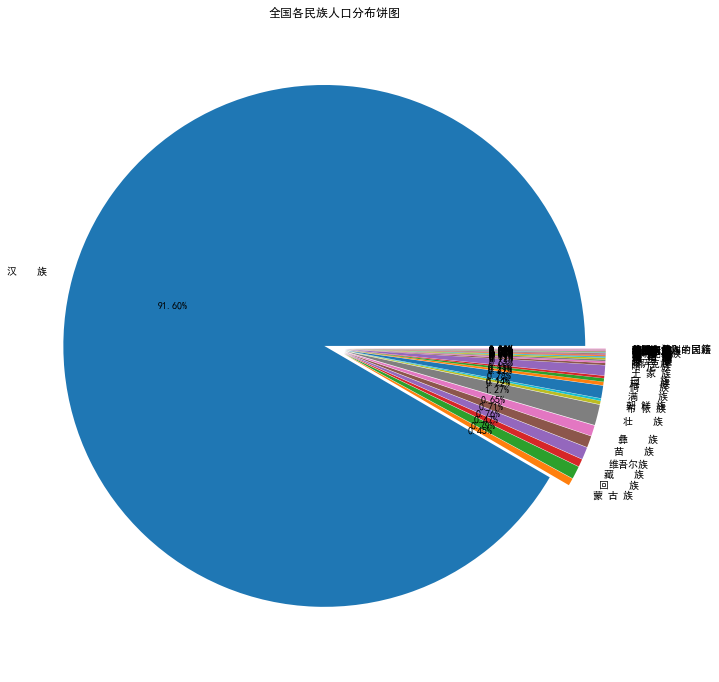

In [64]:
def showNationPieChart():
    plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
    label = nation_list #定义饼图的标签，标签是列表
    explode = [0.04]*58 #设定各项距离圆心n个半径
    values = nation_num_list
    plt.pie(values,explode=explode,labels=label,autopct='%1.2f%%')#绘制饼图
    plt.title('全国各年龄段人口分布饼图')#绘制标题
    plt.show()

showNationPieChart()

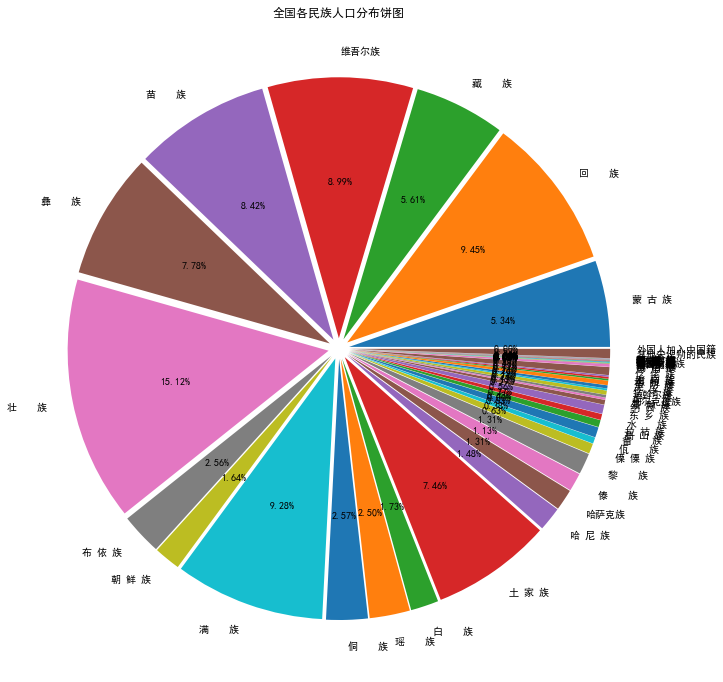

In [65]:
nation_num_list = []
nation_list = list(list_first_tier)
del nation_list[0]

for i in nation_list:
    nation_num_list.append(dataDict[i]['小计']['总  计'])
    
del nation_list[0]
del nation_num_list[0]

def showMinorityNationPieChart():
    plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
    label = nation_list 
    explode = [0.04]*57 
    values = nation_num_list
    plt.pie(values,explode=explode,labels=label,autopct='%1.2f%%')
    plt.title('全国各民族人口分布饼图')#
    plt.show()

showMinorityNationPieChart()